<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [24]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [25]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [26]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [27]:
boston_df=pd.read_csv(boston_url)

#### Task 1: Become familiar with the dataset
#### The following describes the dataset variables:

#### CRIM - per capita crime rate by town

#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#### INDUS - proportion of non-retail business acres per town.

#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#### NOX - nitric oxides concentration (parts per 10 million)

#### RM - average number of rooms per dwelling

#### AGE - proportion of owner-occupied units built prior to 1940

#### DIS - weighted distances to five Boston employment centres

#### RAD - index of accessibility to radial highways

#### TAX - full-value property-tax rate per $10,000

#### PTRATIO - pupil-teacher ratio by town

#### LSTAT - % lower status of the population

#### MEDV - Median value of owner-occupied homes in $1000's####


#### Task 2: Generate Descriptive Statistics and Visualizations
#### Create a box plot for the "Median value of owner-occupied homes"


Text(0.5, 1.0, 'Median value of owner-occupied homes')

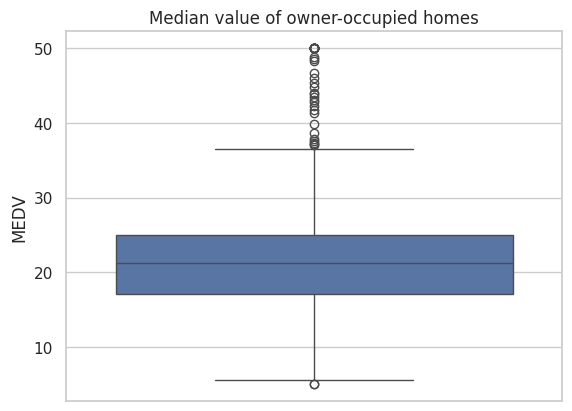

In [22]:
ax1 = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')

#### Provide a bar plot for the Charles river variable


Text(0, 0.5, '')

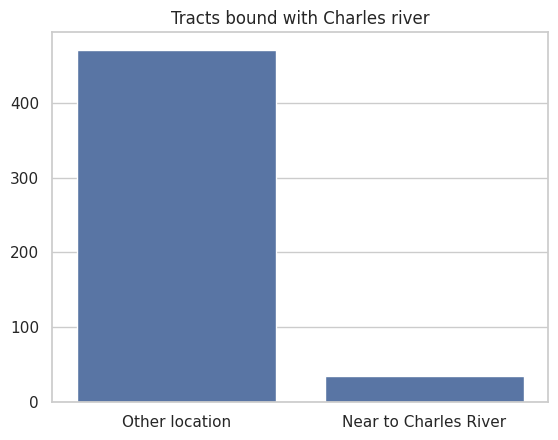

In [11]:
CHAS_count=boston_df.groupby('CHAS').agg({'Unnamed: 0':'count'}).reset_index()
CHAS_count.loc[(CHAS_count['CHAS'] == 0), 'LOC'] = 'Other location'
CHAS_count.loc[(CHAS_count['CHAS'] == 1), 'LOC'] = 'Near to Charles River'
#print(CHAS_count)

sns.set(style="whitegrid")
ax2 = sns.barplot(x="LOC", y="Unnamed: 0", data=CHAS_count)
plt.title('Tracts bound with Charles river')
plt.xlabel('')
plt.ylabel('')

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


Text(0.5, 0, '')

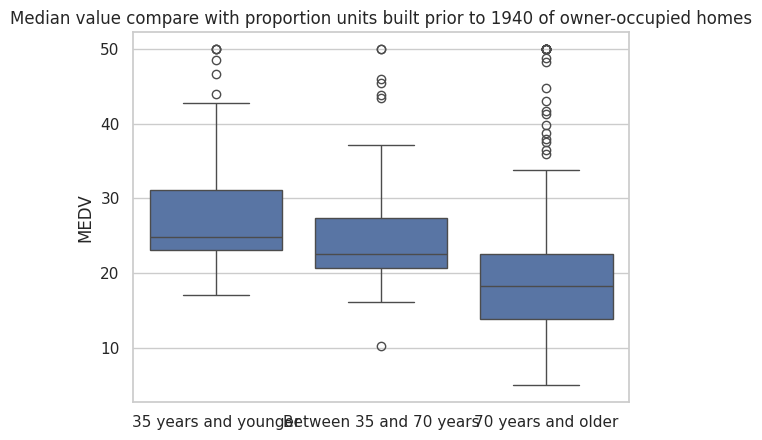

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
#print(boston_df)
by_AGE=boston_df.sort_values('AGE')

ax3 = sns.boxplot(y='MEDV', x='AGE_GROUP', data=by_AGE)
plt.title('Median value compare with proportion units built prior to 1940 of owner-occupied homes')
plt.xlabel('')

#### The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


Text(0.5, 0, 'Proportion of non-retail business acres per town')

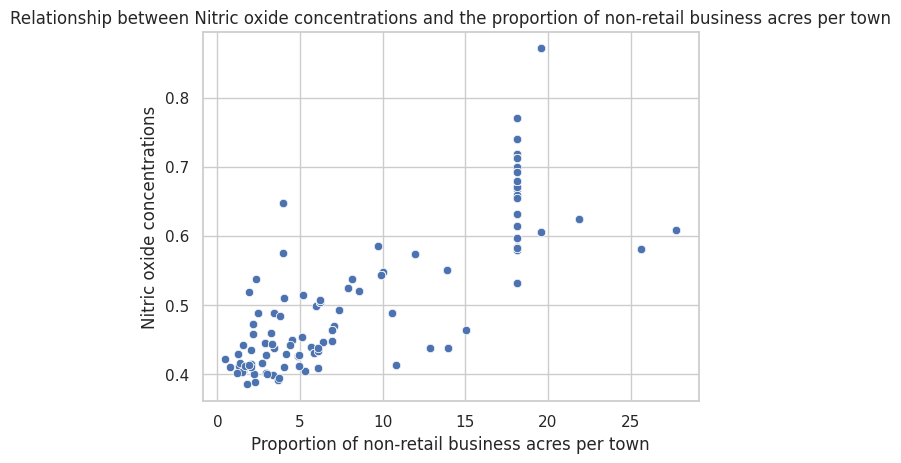

In [13]:
ax4 = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')
plt.xlabel('Proportion of non-retail business acres per town')

#### It seems there is a strong relation beetween Nitric oxide concentrations and the proportion of non-retail business acres per town, a higher proportion of non-retail business acres per town produces a higher concentration of Nitric oxide.


Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio')

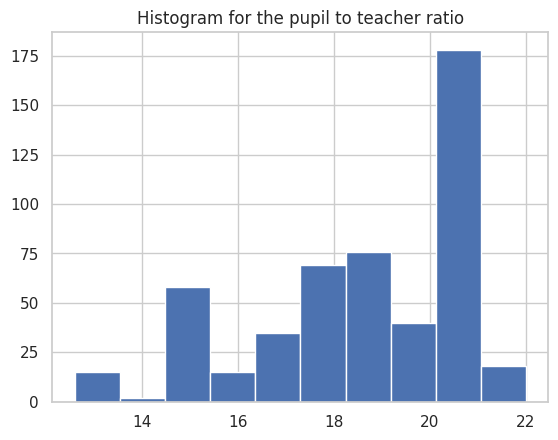

In [14]:
plt.hist(boston_df['PTRATIO'])
plt.title('Histogram for the pupil to teacher ratio')

#### Task 3: Use the appropriate tests to answer the questions provided.
#### Is there a significant difference in median value of houses bounded by the Charles river or not?
#### State the hypothesis

#### 𝐻0-Null Hypothesis: there is no significant difference in median value of houses bounded by the Charles river or not

#### 𝐻1-Alt. Hypothesis: there is a significant difference in median value of houses bounded by the Charles river or not

#### Use α = 0.05


In [15]:
#use the Levene's Test in Python to check test variance

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

#### Since the p-value is lower than 0.05 we cannot assume equality of variance


In [16]:
#T-test for independent samples

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### The p-value is less than 0.05 that means that the Null Hypothesis is rejected as there is a significant difference in median value of houses bounded by the Charles river or not.

#### Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?
#### State the hypothesis

#### 𝐻0-Null Hypothesis: there is not statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940

#### 𝐻1-Alt. Hypothesis: there is statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940

#### Use α = 0.05


In [18]:
#First, separate the three samples (one for each job category) into a variable each.
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [19]:
#Now, run a one-way ANOVA.
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Since the p-value is less than 0.05, we will reject the Null Hypothesis as there is statistical difference in Median values of houses for each proportion of owner occpied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
#### State the hypothesis:

#### 𝐻0-Null Hypothesis: the proportion of non-retail business acres per town is independent of Nitric oxide concentrations.

#### 𝐻1-Alt. Hypothesis: the proportion of non-retail business acres per town is associated with Nitric oxide concentrations.

#### Use α = 0.05


In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### TSince the p-value is less than 0.05, we reject the Null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?


In [21]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        21:48:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""